In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [208]:
ratio_file_path = 'data.xlsx'
standard_file_path = 'only_mode_data.xlsx'
total_deployment = 11
deployment_list = [
"compose-post-service",
"home-timeline-service",
"nginx-thrift",
"post-storage-service",
"social-graph-service",
"text-service",
"unique-id-service",
"url-shorten-service",
"user-mention-service",
"user-service",
"user-timeline-service"
]

In [209]:
df_ratio_file = pd.read_excel(ratio_file_path, sheet_name='summary')
standard_file = pd.read_excel(standard_file_path, sheet_name='standard')

In [210]:
df_ratio_file.head()

,8 1 1,1 6 3,3 6 1,3 1 6,7 1 2,5 1 4,1 5 4,3 1 6.1,1 7 2,1 8 1,6 1 3,1 6 3.1,2 1 7,4 1 5,5 3 2,4 2 4,1 8 1.1,1 8 1.2,3 4 3
0,22.5,7.5,12.0,17.5,22.0,25.0,7.5,18.5,6.0,6.0,21.0,6.0,14.5,18.5,18.5,20.0,6.0,5.5,13.0
1,4.0,4.5,2.5,9.0,5.5,7.5,6.5,8.0,3.0,2.0,5.5,4.5,10.5,7.5,4.0,6.0,2.0,2.0,4.5
2,17.5,30.5,21.0,27.0,20.0,18.0,31.5,26.0,28.5,28.0,21.5,34.5,31.5,24.5,18.5,20.5,28.0,28.5,23.5
3,9.5,17.5,22.0,10.5,9.5,7.5,17.5,9.0,19.5,26.0,10.5,16.5,9.5,9.5,13.5,10.0,22.0,21.0,18.0
4,5.5,2.0,3.0,4.0,5.5,5.0,2.0,5.0,2.0,2.0,5.0,2.0,4.5,5.0,5.0,5.0,2.0,2.0,3.5


In [211]:
standard_file.head()

,api,compose-post-service,home-timeline-service,nginx-thrift,post-storage-service,social-graph-service,text-service,unique-id-service,url-shorten-service,user-mention-service,user-service,user-timeline-service
0,post,100,12.5,11.206897,20.833333,100,100,100,100,100,100,11.764706
1,user,0,0.0,37.068966,33.333333,0,0,0,0,0,0,88.235294
2,home,0,87.5,51.724138,45.833333,0,0,0,0,0,0,0.000000


In [212]:
ratio_list=df_ratio_file.columns.to_list()

In [213]:
ratio_list=list(map(lambda x: x.split(" "),ratio_list))

In [214]:
ratio_list

[['8', '1', '1'],
 ['1', '6', '3'],
 ['3', '6', '1'],
 ['3', '1', '6'],
 ['7', '1', '2'],
 ['5', '1', '4'],
 ['1', '5', '4'],
 ['3', '1', '6.1'],
 ['1', '7', '2'],
 ['1', '8', '1'],
 ['6', '1', '3'],
 ['1', '6', '3.1'],
 ['2', '1', '7'],
 ['4', '1', '5'],
 ['5', '3', '2'],
 ['4', '2', '4'],
 ['1', '8', '1.1'],
 ['1', '8', '1.2'],
 ['3', '4', '3']]

In [215]:
standard_file.set_index("api", inplace=True)

In [216]:
df_standard = standard_file.reset_index(drop=True).T.reset_index(drop=True).T

# 독립 변수
_x = pd.DataFrame()
for ri, r in enumerate(ratio_list):
    # ratio별 (x1, x2, x3) 
    df_ratio = pd.DataFrame(data=[int(_r.split('.')[0]) for _r in r]).T
    # ratio * standard
    ratio_standard = df_ratio.dot(df_standard)
#     print(ratio_standard)
    _sum = ratio_standard.sum(axis=1)
#     print("Sum of all ratio_standard: ", _sum.values[0])
    _l = []
    for _, row in ratio_standard.iterrows():
        _l = row/float(_sum[0]) * 100
    _x = pd.concat([_x, pd.DataFrame(_l).T])

_x = _x.reset_index(drop=True)
# 종속 변수
_y = (df_ratio_file.T).reset_index(drop=True)

print("독립 변수")
display(_x)
print("\n\n")
print("종속 변수")
display(_y)

독립 변수


,0,1,2,3,4,5,6,7,8,9,10
0,12.511466,2.932375,2.790812,3.844669,12.511466,12.511466,12.511466,12.511466,12.511466,12.511466,2.851878
1,4.418322,12.150384,17.178129,15.832319,4.418322,4.418322,4.418322,4.418322,4.418322,4.418322,23.910917
2,8.808509,3.670212,9.036315,9.053190,8.808509,8.808509,8.808509,8.808509,8.808509,8.808509,16.580722
3,8.479613,15.899275,10.770083,10.481744,8.479613,8.479613,8.479613,8.479613,8.479613,8.479613,3.491605
4,12.021528,4.508073,3.760429,4.651186,12.021528,12.021528,12.021528,12.021528,12.021528,12.021528,2.929616
5,10.682866,8.813364,6.409719,6.854839,10.682866,10.682866,10.682866,10.682866,10.682866,10.682866,3.142019
6,4.367341,15.831611,17.619962,16.195556,4.367341,4.367341,4.367341,4.367341,4.367341,4.367341,19.781485
7,8.479613,15.899275,10.770083,10.481744,8.479613,8.479613,8.479613,8.479613,8.479613,8.479613,3.491605
8,4.470506,8.382200,16.725860,15.460501,4.470506,4.470506,4.470506,4.470506,4.470506,4.470506,28.137894
9,4.523939,4.523939,16.262780,15.079796,4.523939,4.523939,4.523939,4.523939,4.523939,4.523939,32.465914





종속 변수


,0,1,2,3,4,5,6,7,8,9,10
0,22.5,4.0,17.5,9.5,5.5,14.0,2.0,5.5,6.5,1.5,11.0
1,7.5,4.5,30.5,17.5,2.0,4.5,1.0,2.5,2.5,1.0,27.5
2,12.0,2.5,21.0,22.0,3.0,6.5,1.0,3.0,3.5,1.0,24.0
3,17.5,9.0,27.0,10.5,4.0,9.5,1.5,5.0,4.5,1.5,9.5
4,22.0,5.5,20.0,9.5,5.5,12.0,1.5,6.0,7.0,1.5,10.0
5,25.0,7.5,18.0,7.5,5.0,13.5,1.5,8.0,6.0,1.5,7.0
6,7.5,6.5,31.5,17.5,2.0,4.0,1.0,2.0,2.5,1.0,25.5
7,18.5,8.0,26.0,9.0,5.0,10.5,1.0,5.5,6.0,2.0,8.5
8,6.0,3.0,28.5,19.5,2.0,3.5,0.5,2.0,2.0,0.5,33.5
9,6.0,2.0,28.0,26.0,2.0,3.5,0.5,2.0,2.0,1.0,28.0


,0,1,2,3,4,5,6,7,8,9,10
0,12.511466,2.932375,2.790812,3.844669,12.511466,12.511466,12.511466,12.511466,12.511466,12.511466,2.851878
1,4.418322,12.150384,17.178129,15.832319,4.418322,4.418322,4.418322,4.418322,4.418322,4.418322,23.910917
2,8.808509,3.670212,9.036315,9.053190,8.808509,8.808509,8.808509,8.808509,8.808509,8.808509,16.580722
3,8.479613,15.899275,10.770083,10.481744,8.479613,8.479613,8.479613,8.479613,8.479613,8.479613,3.491605
4,12.021528,4.508073,3.760429,4.651186,12.021528,12.021528,12.021528,12.021528,12.021528,12.021528,2.929616
5,10.682866,8.813364,6.409719,6.854839,10.682866,10.682866,10.682866,10.682866,10.682866,10.682866,3.142019
6,4.367341,15.831611,17.619962,16.195556,4.367341,4.367341,4.367341,4.367341,4.367341,4.367341,19.781485
7,8.479613,15.899275,10.770083,10.481744,8.479613,8.479613,8.479613,8.479613,8.479613,8.479613,3.491605
8,4.470506,8.382200,16.725860,15.460501,4.470506,4.470506,4.470506,4.470506,4.470506,4.470506,28.137894
9,4.523939,4.523939,16.262780,15.079796,4.523939,4.523939,4.523939,4.523939,4.523939,4.523939,32.465914


,0,1,2,3,4,5,6,7,8,9,10
0,22.5,4.0,17.5,9.5,5.5,14.0,2.0,5.5,6.5,1.5,11.0
1,7.5,4.5,30.5,17.5,2.0,4.5,1.0,2.5,2.5,1.0,27.5
2,12.0,2.5,21.0,22.0,3.0,6.5,1.0,3.0,3.5,1.0,24.0
3,17.5,9.0,27.0,10.5,4.0,9.5,1.5,5.0,4.5,1.5,9.5
4,22.0,5.5,20.0,9.5,5.5,12.0,1.5,6.0,7.0,1.5,10.0
5,25.0,7.5,18.0,7.5,5.0,13.5,1.5,8.0,6.0,1.5,7.0
6,7.5,6.5,31.5,17.5,2.0,4.0,1.0,2.0,2.5,1.0,25.5
7,18.5,8.0,26.0,9.0,5.0,10.5,1.0,5.5,6.0,2.0,8.5
8,6.0,3.0,28.5,19.5,2.0,3.5,0.5,2.0,2.0,0.5,33.5
9,6.0,2.0,28.0,26.0,2.0,3.5,0.5,2.0,2.0,1.0,28.0


,X,Y
0,12.511466,22.5
1,4.418322,7.5
2,8.808509,12.0
3,8.479613,17.5
4,12.021528,22.0
5,10.682866,25.0
6,4.367341,7.5
7,8.479613,18.5
8,4.470506,6.0
9,4.523939,6.0


         X        Y
X  1.00000  0.94596
Y  0.94596  1.00000
전 처리한 X 데이터: 
             0
0   12.511466
1    4.418322
2    8.808509
3    8.479613
4   12.021528
5   10.682866
6    4.367341
7    8.479613
8    4.470506
9    4.523939
10  11.425003
11   4.418322
12   6.741611
13   9.734386
14  10.804848
15   9.797378
16   4.523939
17   4.523939
18   8.673936
전 처리한 X 데이터 shape: (19, 1)

전 처리한 Y 데이터: 
 0     22.5
1      7.5
2     12.0
3     17.5
4     22.0
5     25.0
6      7.5
7     18.5
8      6.0
9      6.0
10    21.0
11     6.0
12    14.5
13    18.5
14    18.5
15    20.0
16     6.0
17     5.5
18    13.0
Name: 0, dtype: float64
전 처리한 Y 데이터 shape: (19,)
절편 : 0.0
회귀 계수 : [1.83458784]
[11.1359482]
w:  2.1591451414830005 , b: -2.899554606777693
[10.2064564]


IndexError: invalid index to scalar variable.

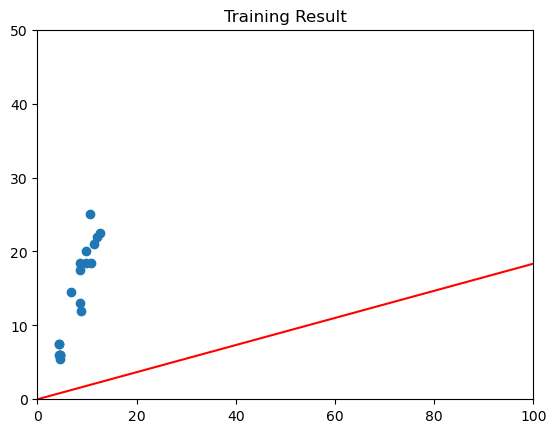

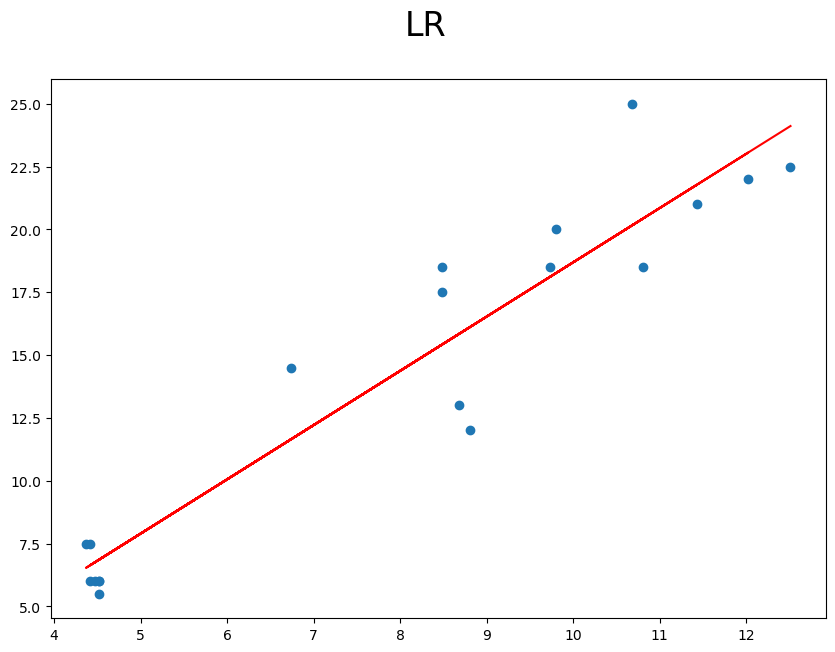

In [218]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def LR(x, y):
    model = LinearRegression()
    model.fit(x, y)
    res = model.coef_[0]*x + model.intercept_
    print('w: ', model.coef_[0], ", b:", model.intercept_)

    X_test = np.array([[6.07]])
    print(model.predict(X_test))
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y)
    plt.plot(x, res, color='red')
    plt.suptitle("LR", size=24)
    plt.title('w=' + str(np.round(model.coef_[0], 3))+', b=' + str(np.round(model.intercept_[0], 3)))
    plt.show()
    return model.coef_[0], model.intercept_, res

for i in range(0, total_deployment):
    x = _x.loc[:,i]
    y = _y.loc[:,i]
    data = {"X": x,"Y": y}
    df = pd.DataFrame(data)
    print("======")
    display(_x)
    display(_y)
    print("======")
    display(df)
    print(df.corr(method='pearson'))
    """
    1. X의 형태를 변환하여 train_X에 저장합니다.
    """
    train_X = pd.DataFrame(x)
    """
    2. Y의 형태를 변환하여 train_Y에 저장합니다.
    """
    train_Y = pd.Series(y)

    # 변환된 데이터를 출력합니다.
    print('전 처리한 X 데이터: \n {}'.format(train_X))
    print('전 처리한 X 데이터 shape: {}\n'.format(train_X.shape))

    print('전 처리한 Y 데이터: \n {}'.format(train_Y))
    print('전 처리한 Y 데이터 shape: {}'.format(train_Y.shape))
    
    """
    1. 모델을 초기화 합니다.
    """
    lrmodel = LinearRegression(fit_intercept=False)

    """
    2. train_X, train_Y 데이터를 학습합니다.
    """
    lrmodel.fit(train_X, train_Y)
    print('절편 :', lrmodel.intercept_)
    print('회귀 계수 :', lrmodel.coef_)
    
    X_test = np.array([[6.07]])
    print(lrmodel.predict(X_test))

    # 학습한 결과를 시각화하는 코드입니다.
    plt.scatter(x, y) 
    plt.plot([0, 100], [lrmodel.intercept_, 10 * lrmodel.coef_[0] + lrmodel.intercept_], c='r') 
    plt.xlim(0, 100) 
    plt.ylim(0, 50) 
    plt.title('Training Result')
    plt.savefig("test.png")
    
    _, _, res = LR(train_X, train_Y)
    # w, b, res = SLR(x, y)
    data = np.concatenate((x, y, res), axis=1)
    df = pd.DataFrame(data, columns=['x', 'y', 'predict'])

    print("결정계수: ", r2_score(y, res))
    print("상관계수: \n", df.corr())
    print("MSE: ", mean_squared_error(y, res))
    break
